# Airlines+Data

Forecast the CocaCola prices and Airlines Passengers data set. Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model.
Finally which model you will use for 
Forecasting.

#### Importing the required libraries for Analysis

In [1]:
import pandas as pd
import numpy as np

#### Loading the dataset

In [2]:
df = pd.read_excel(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 18_ Forecasting\Airlines+Data.xlsx",header=0,parse_dates=True)

In [3]:
df

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


### EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [5]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [6]:
####  making the month column as index

In [7]:
df.set_index('Month',inplace=True)

In [8]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [9]:
df.index.year

Int64Index([1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995, 1995,
            1995, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            1996, 1996, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997, 1997,
            1997, 1997, 1997, 1998, 1998, 1998, 1998, 1998, 1998, 1998, 1998,
            1998, 1998, 1998, 1998, 1999, 1999, 1999, 1999, 1999, 1999, 1999,
            1999, 1999, 1999, 1999, 1999, 2000, 2000, 2000, 2000, 2000, 2000,
            2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001,
            2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002,
            2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002],
           dtype='int64', name='Month')

In [10]:
df.isnull().sum()

Passengers    0
dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [12]:
df[df.duplicated()].shape

(16, 1)

We found the 16 duplicated rows

In [13]:
df[df.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


## Graphs

In [16]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

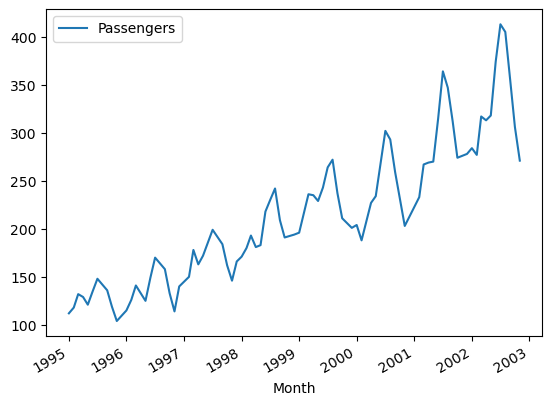

In [17]:
df.plot()
pyplot.show()

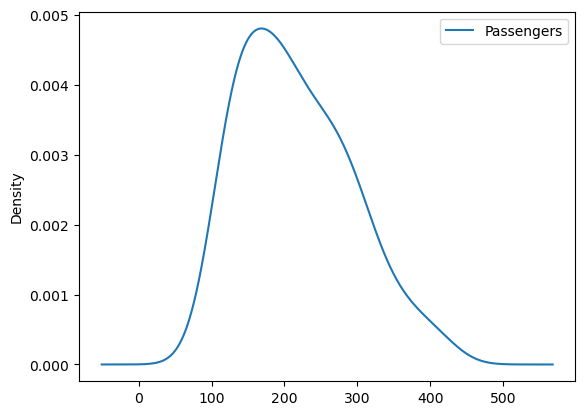

In [18]:
df.plot(kind='kde')
pyplot.show()

### Histogram and Density Plots

**create a histogram plot**

In [19]:
from pandas import read_csv
from matplotlib import pyplot

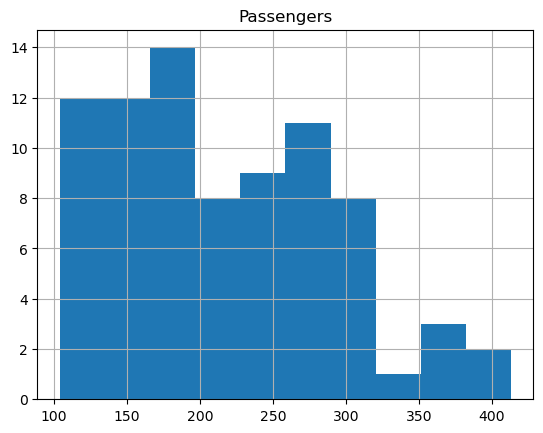

In [20]:
df.hist()
pyplot.show()

**create a density plot**

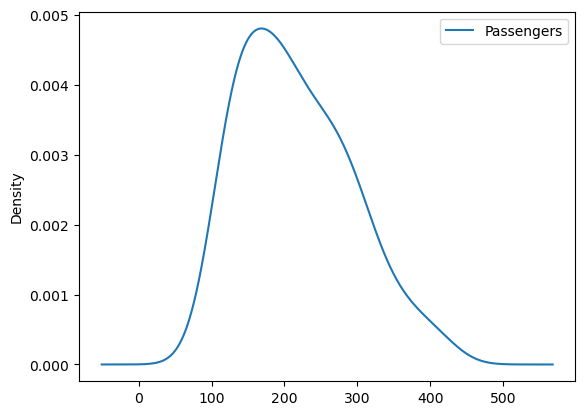

In [21]:
from pandas import read_csv
from matplotlib import pyplot

df.plot(kind='kde')
pyplot.show()

## Box and Whisker Plots by Interval

### **Lag plot**

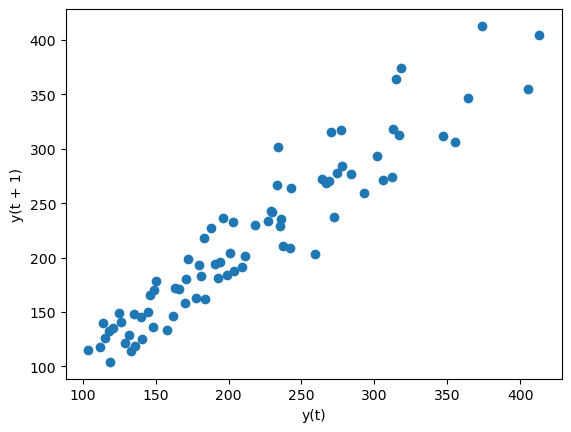

In [22]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(df)
pyplot.show()

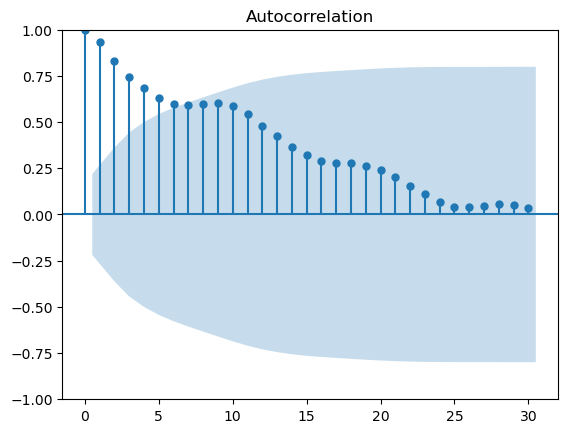

In [23]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df,lags=30)
pyplot.show()

# Upsampling Data

### upsample to daily intervals

In [24]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\2660633312.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [25]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [26]:
upsampled = df.resample('D').mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


## Interpolate the missing value

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


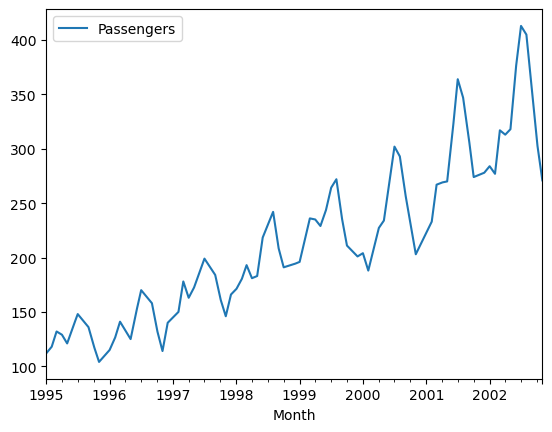

In [27]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(32))
interpolated.plot()
pyplot.show()

<AxesSubplot:xlabel='Month'>

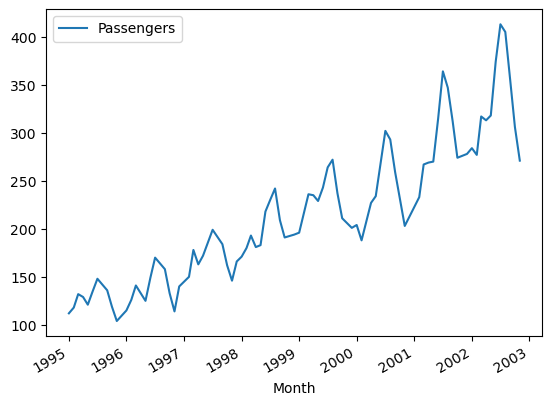

In [28]:
df.plot()

## Downsampling Data

## downsample to quarterly intervals

In [29]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\2660633312.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [30]:
resample = df.resample('Q')
quarterly_mean_sales = resample.mean()

<AxesSubplot:xlabel='Month'>

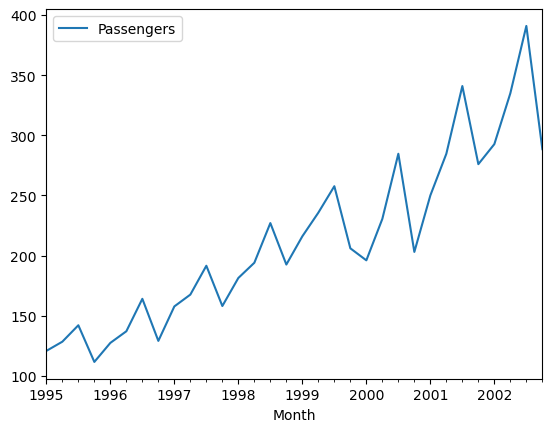

In [31]:
quarterly_mean_sales.plot()

## Tranformations

### load and plot a time series

In [32]:
from pandas import read_csv
from matplotlib import pyplot

In [33]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


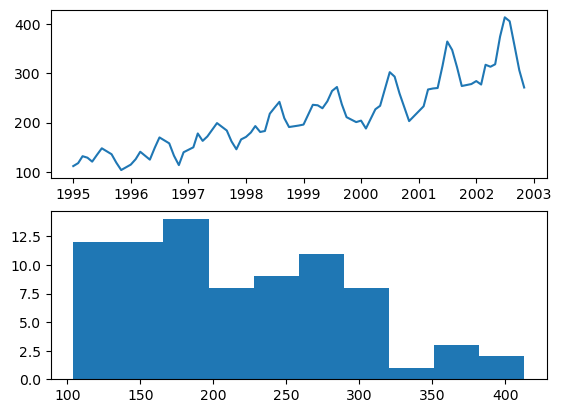

In [34]:
# line plot
pyplot.subplot(211)
pyplot.plot(df)
# histogram
pyplot.subplot(212)
pyplot.hist(df)
pyplot.show()

## Square Root Transform

In [35]:
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot

In [36]:
dataframe = DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = sqrt(dataframe['passengers'])

In [37]:
dataframe.head()

,passengers
0,10.583005
1,10.862780
2,11.489125
3,11.357817
4,11.000000


## line plot

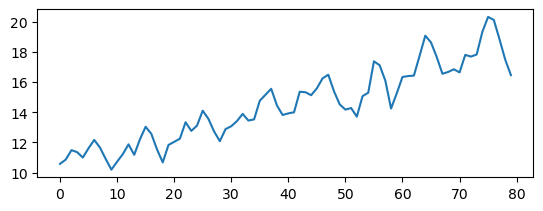

In [38]:
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

# histogram

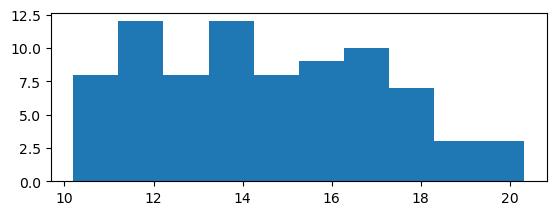

In [39]:
pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Log Transform

In [40]:
from numpy import log
dataframe = DataFrame(df.values)
dataframe.columns = ['passengers']
dataframe['passengers'] = log(dataframe['passengers'])

## line plot

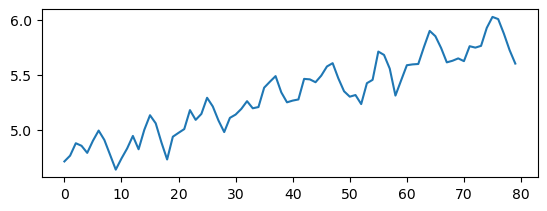

In [41]:
pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

            Passengers
Month                 
1995-03-31  120.666667
1995-06-30  128.333333
1995-09-30  142.000000
1995-12-31  111.500000
1996-03-31  127.333333


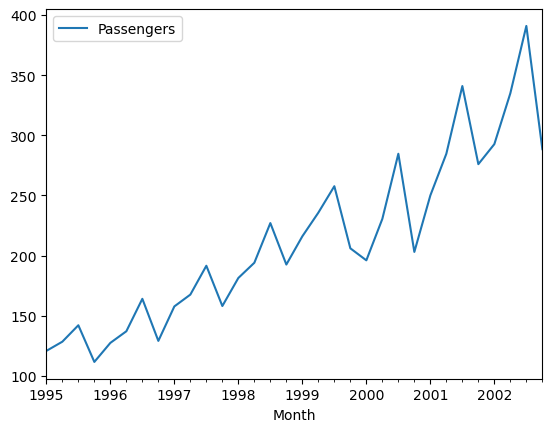

In [42]:
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
pyplot.show()

In [43]:
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## SES

In [44]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

## Holts Exponential Smoothing

In [45]:
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:xlabel='Month'>

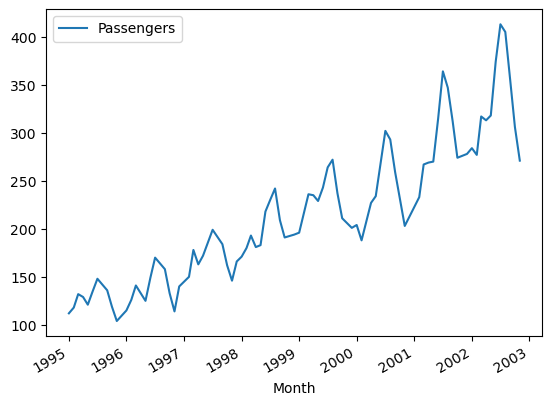

In [46]:
df.plot()

## Splitting data

In [47]:
Train = df.head(147)
Test =df.tail(12)

## Moving Average

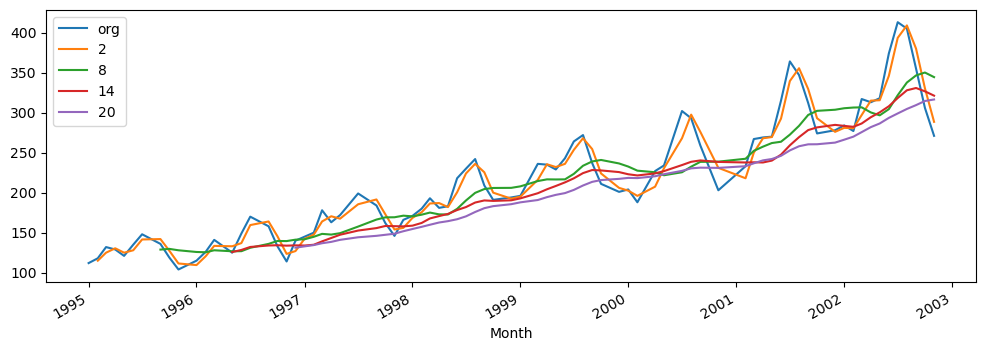

In [48]:
plt.figure(figsize=(12,4))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    df["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

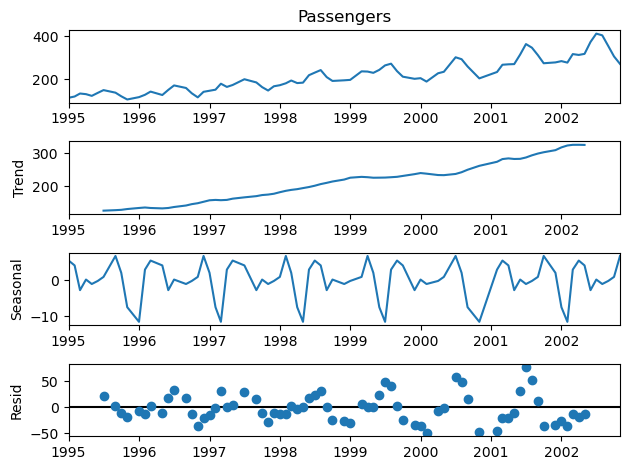

In [49]:
decompose_ts_add = seasonal_decompose(df.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


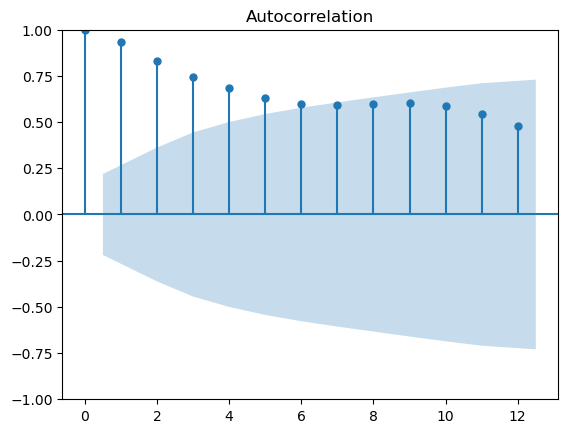

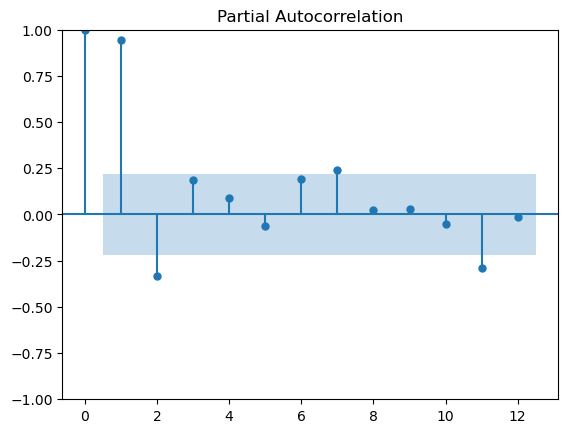

In [50]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers,lags=12)
plt.show()

## Evaluation Metric MAPE

In [51]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [52]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


11.499285068234371

## Holt method

In [53]:
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\shira\AppData\Local\Temp\ipykernel_64596\4189533333.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


8.651977513300208

## Holts winter exponential smoothing with
# **Additive seasonality and additive trend**

In [54]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


6.965790910337426

## Holts winter exponential smoothing with
# **multiplicative seasonality and additive trend**

In [55]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


5.516631511805766

## Final Model by combining train and test

In [56]:
hwe_model_add_add = ExponentialSmoothing(df["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Forecasting for next 10 time periods

In [57]:
hwe_model_add_add.forecast(10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


80    269.371445
81    263.425255
82    263.259719
83    281.401390
84    286.583372
85    287.975638
86    293.255236
87    302.638205
88    301.586019
89    299.251196
dtype: float64

In [58]:
df.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Splitting data

In [59]:
Train = df.head(147)
Test =df.tail(12)

In [60]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()

In [61]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast()

2002-11-02    269.867087
Freq: D, dtype: float64

In [62]:
df

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


In [63]:
df.reset_index(inplace=True)

In [64]:
df['t'] = 1

In [65]:
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,1
2,1995-03-01,132,1
3,1995-04-01,129,1
4,1995-05-01,121,1
...,...,...,...
75,2002-07-01,413,1
76,2002-08-01,405,1
77,2002-09-01,355,1
78,2002-10-01,306,1


In [66]:
for i,row in df.iterrows():
  df['t'].iloc[i] = i+1

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\3113747851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'].iloc[i] = i+1


In [67]:
df

,Month,Passengers,t
0,1995-01-01,112,1
1,1995-02-01,118,2
2,1995-03-01,132,3
3,1995-04-01,129,4
4,1995-05-01,121,5
...,...,...,...
75,2002-07-01,413,76
76,2002-08-01,405,77
77,2002-09-01,355,78
78,2002-10-01,306,79


In [68]:
df['t_sq'] = (df['t'])**2

In [69]:
df

,Month,Passengers,t,t_sq
0,1995-01-01,112,1,1
1,1995-02-01,118,2,4
2,1995-03-01,132,3,9
3,1995-04-01,129,4,16
4,1995-05-01,121,5,25
...,...,...,...,...
75,2002-07-01,413,76,5776
76,2002-08-01,405,77,5929
77,2002-09-01,355,78,6084
78,2002-10-01,306,79,6241


In [70]:
# month extraction
df["month"] = df.Month.dt.strftime("%b") 

# month extraction
df["year"] = df.Month.dt.strftime("%Y") 

In [71]:
df

,Month,Passengers,t,t_sq,month,year
0,1995-01-01,112,1,1,Jan,1995
1,1995-02-01,118,2,4,Feb,1995
2,1995-03-01,132,3,9,Mar,1995
3,1995-04-01,129,4,16,Apr,1995
4,1995-05-01,121,5,25,May,1995
...,...,...,...,...,...,...
75,2002-07-01,413,76,5776,Jul,2002
76,2002-08-01,405,77,5929,Aug,2002
77,2002-09-01,355,78,6084,Sep,2002
78,2002-10-01,306,79,6241,Oct,2002


## converting the dummy variables for 

In [72]:
months = pd.get_dummies(df['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,1,0,0,0,0,0,0
76,0,1,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,0,1
78,0,0,0,0,0,0,0,0,0,0,1,0


**storing the months as serial wise again in months variable**

In [73]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [74]:
df1 = pd.concat([df,months],axis=1)

In [75]:
df.head()

,Month,Passengers,t,t_sq,month,year
0,1995-01-01,112,1,1,Jan,1995
1,1995-02-01,118,2,4,Feb,1995
2,1995-03-01,132,3,9,Mar,1995
3,1995-04-01,129,4,16,Apr,1995
4,1995-05-01,121,5,25,May,1995


In [76]:
df1['log_passengers'] = np.log(df1['Passengers'])

In [77]:
df1

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,76,5776,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
76,2002-08-01,405,77,5929,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
77,2002-09-01,355,78,6084,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
78,2002-10-01,306,79,6241,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot:xlabel='month', ylabel='year'>

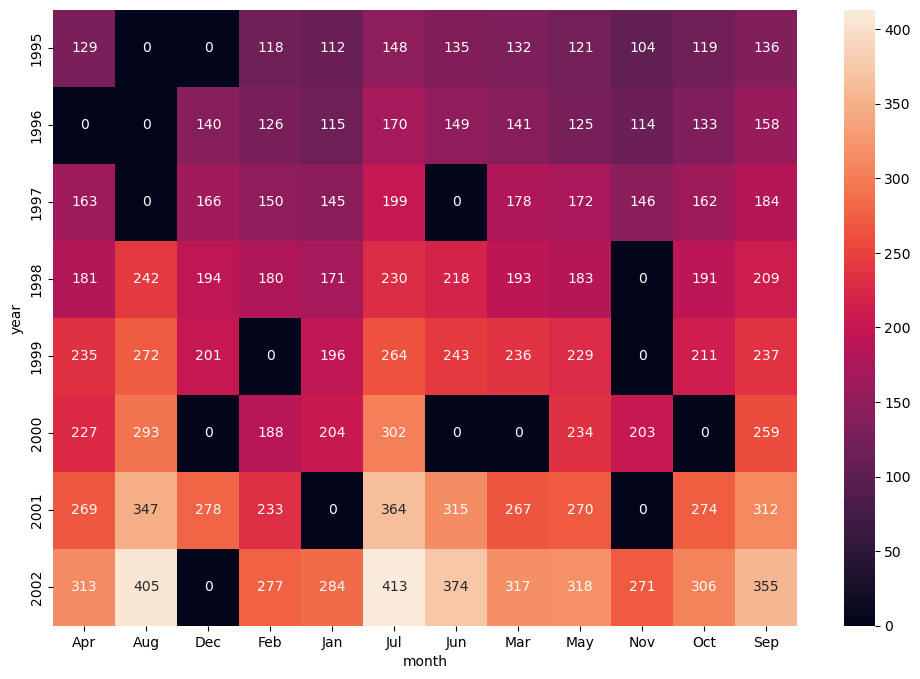

In [78]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df1,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

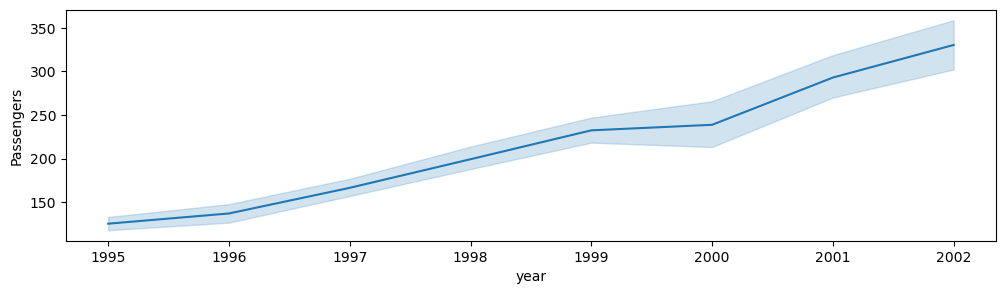

In [79]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df1)

In [80]:
Train = df1.head(147)
Test =df1.tail(12)

In [81]:
Train

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,76,5776,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
76,2002-08-01,405,77,5929,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
77,2002-09-01,355,78,6084,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
78,2002-10-01,306,79,6241,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


In [82]:
Test

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
68,2001-12-01,278,69,4761,Dec,2001,0,0,0,0,0,0,0,0,0,0,0,1,5.627621
69,2002-01-01,284,70,4900,Jan,2002,1,0,0,0,0,0,0,0,0,0,0,0,5.648974
70,2002-02-01,277,71,5041,Feb,2002,0,1,0,0,0,0,0,0,0,0,0,0,5.624018
71,2002-03-01,317,72,5184,Mar,2002,0,0,1,0,0,0,0,0,0,0,0,0,5.758902
72,2002-04-01,313,73,5329,Apr,2002,0,0,0,1,0,0,0,0,0,0,0,0,5.746203
73,2002-05-01,318,74,5476,May,2002,0,0,0,0,1,0,0,0,0,0,0,0,5.762051
74,2002-06-01,374,75,5625,Jun,2002,0,0,0,0,0,1,0,0,0,0,0,0,5.924256
75,2002-07-01,413,76,5776,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
76,2002-08-01,405,77,5929,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
77,2002-09-01,355,78,6084,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118


## **Linear Model**

In [83]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

45.624264262165624

#Exponential

In [84]:
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

44.569773536120906

## **Quadratic**

In [85]:
df1['log_passengers'] = np.log(df1['Passengers'])

In [86]:
Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

44.48607380182475

In [87]:
df.shape

(80, 6)

In [88]:
t= np.arange(1,81)

In [89]:
df1['t'] = t

In [90]:
df1['t_sq'] = df1['t']*df1['t']

In [91]:
log_Passengers=np.log(df1['Passengers'])

In [92]:
df1['log_Passengers']=log_Passengers

In [93]:
df1.head()

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers,log_Passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791,4.795791


# Additive seasonality 

In [94]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

111.16569828184326

#Additive Seasonality Quadratic

In [95]:
add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

17.96160543241091

##Multiplicative Seasonality


In [96]:
Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

121.07751239973489

#Multiplicative Additive Seasonality 

In [97]:
Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

8.479650276666268

#Compareing the results 

In [98]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,8.479650
4,rmse_add_sea_quad,17.961605
2,rmse_Quad,44.486074
1,rmse_Exp,44.569774
0,rmse_linear,45.624264
3,rmse_add_sea,111.165698
5,rmse_Mult_sea,121.077512


# Predict for new time period

In [99]:
predict_data = df1

In [100]:
predict_data

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers,log_Passengers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499,4.718499
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685,4.770685
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802,4.882802
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812,4.859812
4,1995-05-01,121,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,76,5776,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448,6.023448
76,2002-08-01,405,77,5929,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887,6.003887
77,2002-09-01,355,78,6084,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118,5.872118
78,2002-10-01,306,79,6241,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585,5.723585


In [101]:
#Build the model on entire data set
model_full = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df1).fit()

In [102]:
pred_new  = pd.Series(add_sea_Quad.predict(predict_data))
pred_new

0     105.073760
1     102.357158
2     133.416362
3     124.954821
4     123.076090
         ...    
75    374.344351
76    384.782471
77    347.767118
78    322.887002
79    299.721990
Length: 80, dtype: float64

In [103]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [104]:
predict_data["forecasted_Passangers"] = pd.Series(pred_new)

In [105]:
predict_data

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,...,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers,log_Passengers,forecasted_Passangers
0,1995-01-01,112,1,1,Jan,1995,1,0,0,0,...,0,0,0,0,0,0,0,4.718499,4.718499,105.073760
1,1995-02-01,118,2,4,Feb,1995,0,1,0,0,...,0,0,0,0,0,0,0,4.770685,4.770685,102.357158
2,1995-03-01,132,3,9,Mar,1995,0,0,1,0,...,0,0,0,0,0,0,0,4.882802,4.882802,133.416362
3,1995-04-01,129,4,16,Apr,1995,0,0,0,1,...,0,0,0,0,0,0,0,4.859812,4.859812,124.954821
4,1995-05-01,121,5,25,May,1995,0,0,0,0,...,0,0,0,0,0,0,0,4.795791,4.795791,123.076090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2002-07-01,413,76,5776,Jul,2002,0,0,0,0,...,0,1,0,0,0,0,0,6.023448,6.023448,374.344351
76,2002-08-01,405,77,5929,Aug,2002,0,0,0,0,...,0,0,1,0,0,0,0,6.003887,6.003887,384.782471
77,2002-09-01,355,78,6084,Sep,2002,0,0,0,0,...,0,0,0,1,0,0,0,5.872118,5.872118,347.767118
78,2002-10-01,306,79,6241,Oct,2002,0,0,0,0,...,0,0,0,0,1,0,0,5.723585,5.723585,322.887002


# 2)CocaCola_Sales_Rawdata

In [106]:
import pandas as pd
import numpy as np

## Loading the dataset

In [107]:
df = pd.read_excel(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 18_ Forecasting\CocaCola_Sales_Rawdata.xlsx",header=0,parse_dates=True)

In [108]:
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


# EDA

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [110]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


####  making the month column as index

In [111]:
df.set_index('Quarter',inplace=True)

In [112]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


In [113]:
df.isnull().sum()

Sales    0
dtype: int64

In [114]:
df.isnull().sum().sum()

0

In [115]:
df[df.duplicated()].shape

(0, 1)

**We found the 0 duplicated rows**

In [116]:
df[df.duplicated()]

,Sales
Quarter,


In [117]:
df.drop_duplicates(inplace=True)

In [118]:
df

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


## Graphs

In [119]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

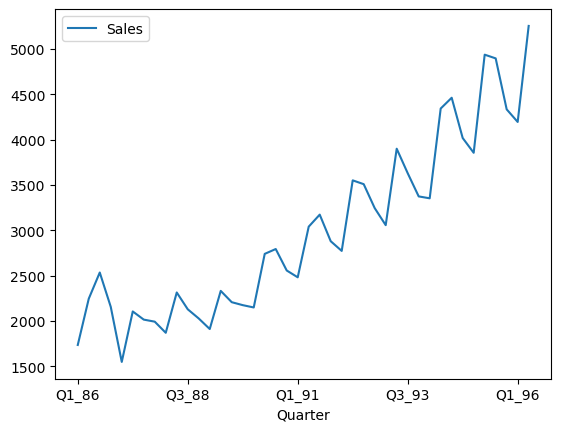

In [120]:
df.plot()
pyplot.show()

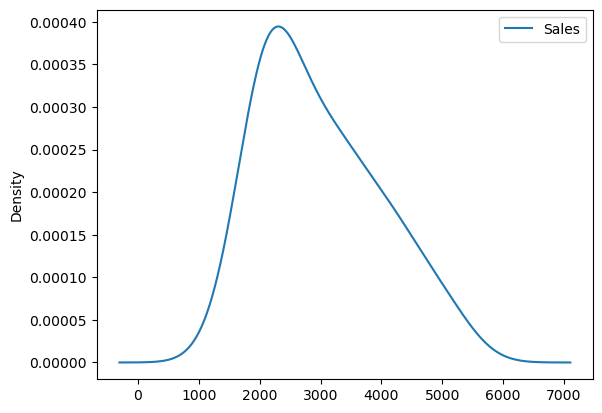

In [121]:
df.plot(kind='kde')
pyplot.show()

## Histogram and Density Plots

**create a histogram plot**

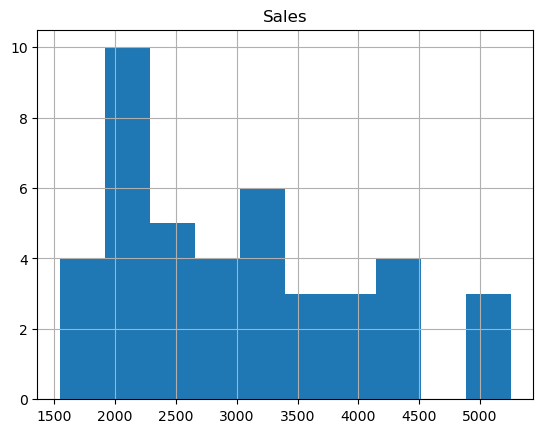

In [122]:
df.hist()
pyplot.show()

**create a density plot**

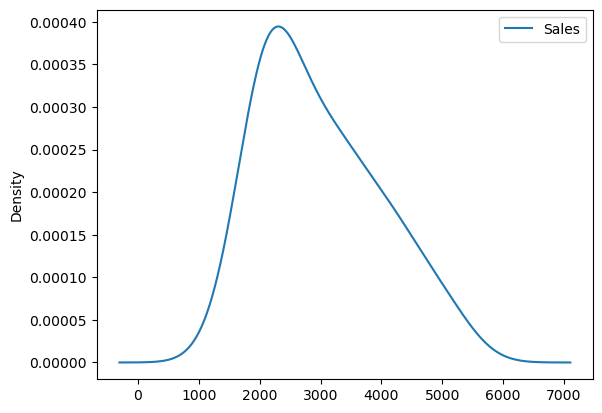

In [123]:
from pandas import read_csv
from matplotlib import pyplot

df.plot(kind='kde')
pyplot.show()

## Box and Whisker Plots by Interval

**Lag plot**

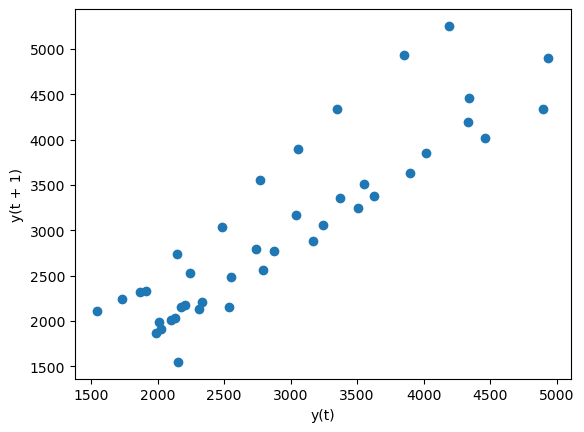

In [124]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

lag_plot(df)
pyplot.show()

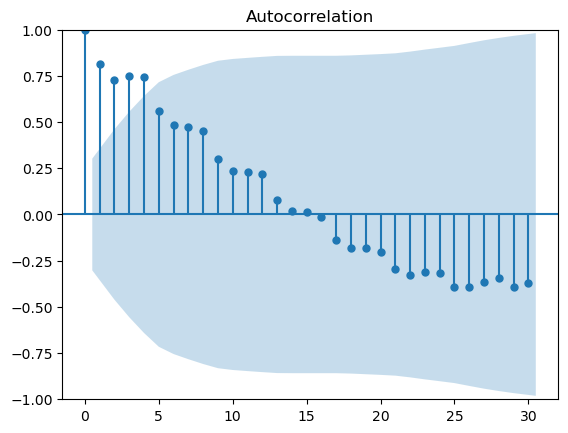

In [125]:
# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df,lags=30)
pyplot.show()

## Forecast

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

<AxesSubplot:xlabel='Quarter'>

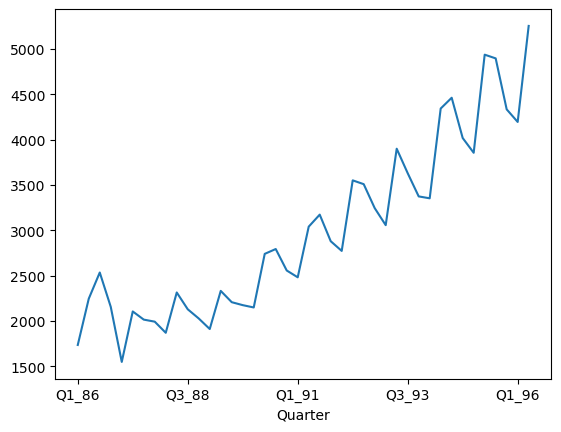

In [128]:
df.Sales.plot()

# **Data Driven Models**

## Splitting data

In [129]:
df.shape

(42, 1)

In [130]:
Train = df.head(30)
Test = df.tail(12)

## Moving Average

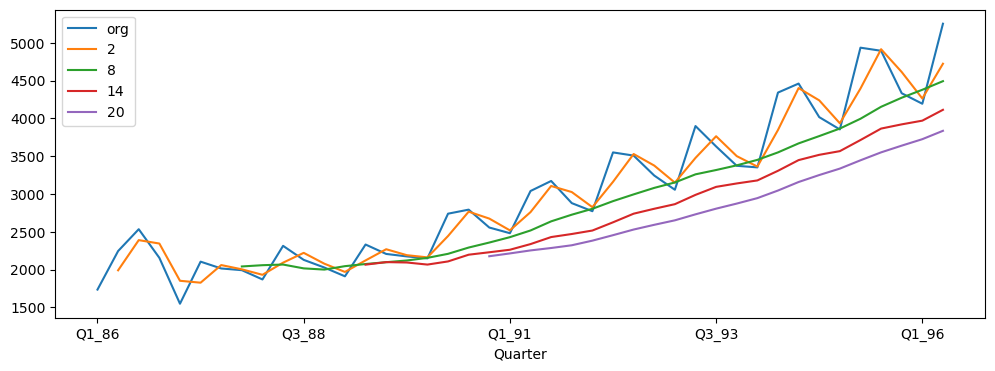

In [131]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,24,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

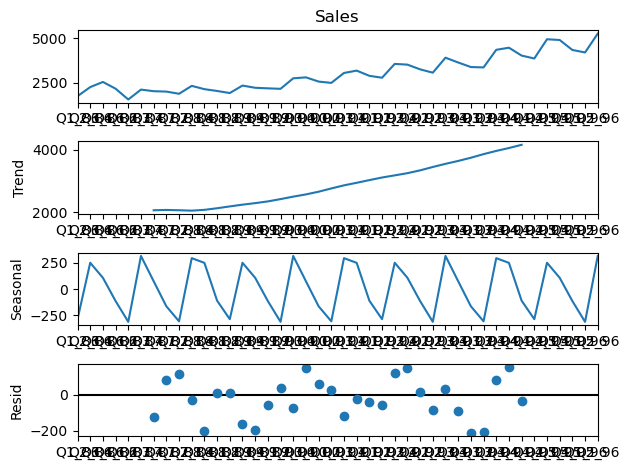

In [132]:
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


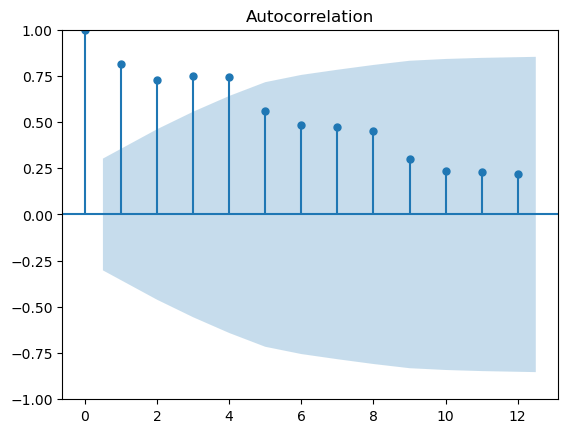

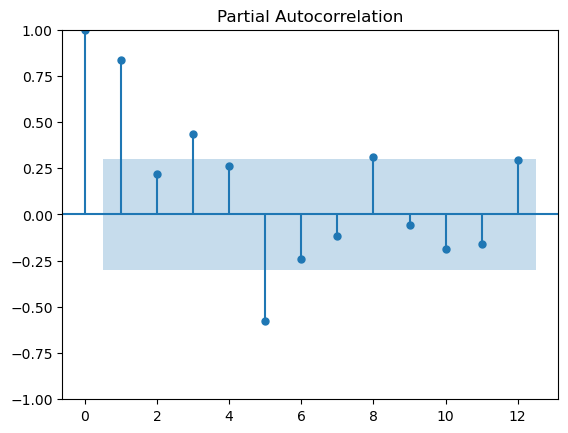

In [133]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show()

## Evaluation Metric RMSE

In [134]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

## Simple Exponential Method

In [135]:
Train = df.head(48)
Test =df.tail(12)

In [136]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) # 9.76

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


9.765094286822912

## Holt method

In [137]:
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


11.025182503719508

## Holts winter exponential smoothing with additive seasonality and additive trend

In [138]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\1311508392.py:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


3.4195230368037897

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [139]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


2.749200154760736

## Final Model by combining train and test

In [140]:
hwe_model_add_add = ExponentialSmoothing(df["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## Forecasting for next 10 time periods

In [141]:
hwe_model_add_add.forecast(10)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


42    5056.794112
43    4931.076797
44    4886.399011
45    5553.357119
46    5586.600620
47    5336.180429
48    5235.151005
49    5968.196254
50    6027.594999
51    5756.337301
dtype: float64

In [142]:
df.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


# **ARIMA**

# Persistence/ Base model

### evaluate a persistence model

In [143]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\1026499641.py:6: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [144]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


# ARIMA Hyperparameters

## grid search ARIMA parameters for a time series

In [145]:
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

## evaluate an ARIMA model for a given order (p,d,q) and return RMSE

In [146]:
def evaluate_arima_model(X, arima_order):
    X = X.astype('float32')      # prepare training dataset
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()   # make predictions
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)

        model_fit = model.fit(disp=0)   # model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    rmse = sqrt(mean_squared_error(test, predictions))   # calculate out of sample error
    return rmse

# Grid search for p,d,q values

In [147]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [148]:
# load dataset
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# evaluate parameters
#p_values = range(0, 5)
#d_values = range(0, 5)
#q_values = range(0, 5)
warnings.filterwarnings("ignore")

C:\Users\shira\AppData\Local\Temp\ipykernel_64596\1991609797.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


# Build Model based on the optimized values

In [149]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

In [150]:
# load data
train = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [151]:
dir(ARIMA)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_kwargs',
 '_clone_from_init_kwds',
 '_conditional_sum_squares',
 '_fit_collinear',
 '_fit_zeros',
 '_forecasts_error_partial_derivatives',
 '_formula_max_endog',
 '_get_exog_names',
 '_get_extension_time_varying_matrices',
 '_get_index_label_loc',
 '_get_index_loc',
 '_get_index_with_final_state',
 '_get_init_kwds',
 '_get_model_names',
 '_get_prediction_index',
 '_handle_data',
 '_hessian_complex_step',
 '_hessian_finite_difference',
 '_hessian_oim',
 '_hessian_opg',
 '_hessian_param_defaults',
 '_hessian_param_names',
 '_init_dates',
 '_kwargs_allowed',
 '_loglike_param_defaults',

In [152]:
# fit model
model = ARIMA(X, order=(3,2,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
pred=model_fit.predict(1,42)

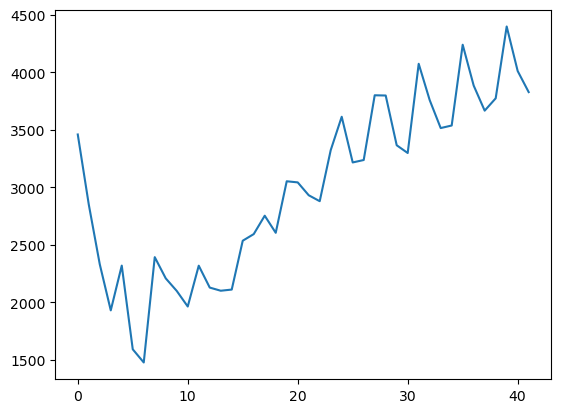

In [153]:
plt.plot(pred)

In [154]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

TypeError: Singleton array 3296.844516694531 cannot be considered a valid collection.

## Combine train and test data and build final model

In [155]:
# fit model
data = read_csv('water.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

In [156]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

In [157]:
forecast=model_fit.forecast(steps=10)[0]
pred=model_fit.predict(1,80)

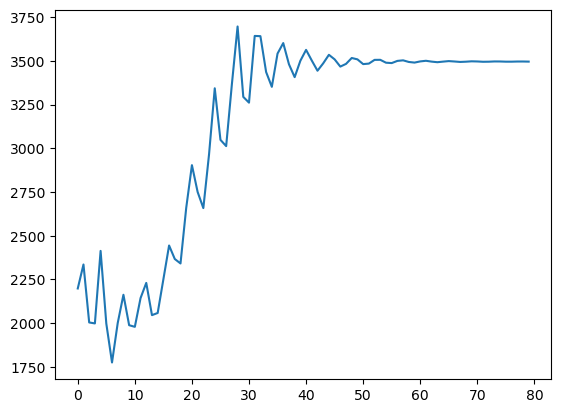

In [158]:
plt.plot(pred)

In [161]:
forecast

3260.9844090012107